## Heart rate estimation
Following set of data was presented as a part of [ICASSP 2014](http://icassp2015.org) [signal processing cup](http://www.signalprocessingsociety.org/spcup2015/index.html).

Below is my attempt to solve the challenge.

* Note: This notebook uses Python 3

### Experiment description and data format

* Two-channel PPG signals, three-axis accelorometer signals and one-channel ECG signal (ground truth) were recorded from subjects.
* All signals were sampled at 125 Hz.
* Each dataset with similar name 'DATA_01_TYPE_01' contains a variable 'sig'. It has 6 rows. The first row ECG, second and third rows are two channel PPG and the last three rows are accelerometer data.

* Two activities:
  * Activity **TYPE01**: rest(30s) -> 8km/h(1min) -> 15km/h(1min) -> 8km/h(1min) -> 15km/h(1min) -> rest(30s)
  * Activity **TYPE02**: rest(30s) -> 6km/h(1min) -> 12km/h(1min) -> 6km/h(1min) -> 12km/h(1min) -> rest(30s)
  
  So there are 300 sec worth of data sampled at 125 Hz.
  
  For each dataset with the similar name 'DATA_01_TYPE01', the ground-truth of heart rate can be calculated from the simultaneously recorded ECG signal (i.e. the first row of the variable 'sig'). For convenience, we also provide the calculated ground-truth heart rate, stored in the datasets with the corresponding name, say 'DATA_01_TYPE01_BPMtrace'. In each of this kind of datasets, there is a variable 'BPM0', which gives the BPM value in every 8-second time window. Note that two successive time windows overlap by 6 seconds. Thus the first value in 'BPM0' gives the calcualted heart rate ground-truth in the first 8 seconds, while the second value in 'BPM0' gives the calculated heart rate ground-truth from the 3rd second to the 10th second.

**Reference**

Z. Zhang, Z. Pi, B. Liu, **TROIKA: A general framework for heart rate monitoring using wrist-type photoplethysmographic signals during intensive physical exercise**, IEEE Transactions on Biomedical Engineering, vol. 62, no. 2, pp. 522-531, February 2015, DOI: 10.1109/TBME.2014.2359372


In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
FREQ_SAMPLE = 125  

Lets begin by visualizing first data for Activity **TYPE01**. Using `loadmat` to read the data stored in MATLAB's .mat files. The `loadmat` function returns a `dict` type.

In [56]:
mat_data = loadmat('../training_data/DATA_01_TYPE01.mat')

In [57]:
mat_data.keys()

dict_keys(['__header__', '__version__', 'sig', '__globals__'])

In [60]:
data = mat_data['sig']  # Extract just the matrix
num_sig , num_sample = data.shape

So as expected the 'sig' matrix has 6 rows as described above. Lets visualize the ECG and PPG signal.

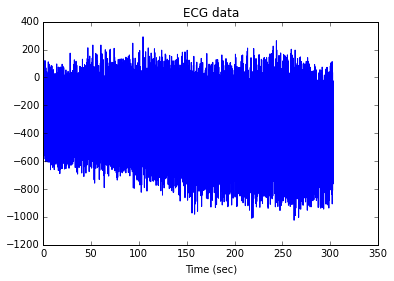

In [63]:
t = np.linspace(0, num_sample/FREQ_SAMPLE, num_sample)
plt.plot(t, data[0,:])
plt.title('ECG data')
plt.xlabel('Time (sec)')

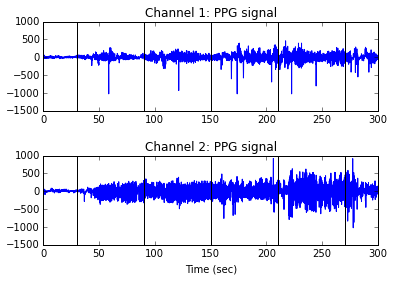

In [75]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
ax1.plot(t, data[1, :])
ax1.axvline(x = 30, color='k')
ax1.axvline(x = 90, color='k')
ax1.axvline(x = 150, color='k')
ax1.axvline(x = 210, color='k')
ax1.axvline(x = 270, color='k')
ax1.set_title('Channel 1: PPG signal')
ax1.set_xlim((0, 300))

ax2.plot(t, data[2, :])
ax2.set_title('Channel 2: PPG signal')
ax2.set_xlabel('Time (sec)')

ax2.axvline(x = 30, color='k')
ax2.axvline(x = 90, color='k')
ax2.axvline(x = 150, color='k')
ax2.axvline(x = 210, color='k')
ax2.axvline(x = 270, color='k')
ax2.set_xlim((0, 300))
f.subplots_adjust(hspace=0.5)


Take a look at the magnitude spectrum 

In [87]:
mat_bpm = loadmat('../training_data/DATA_01_TYPE01_BPMtrace.mat')
data_bpm = mat_bpm['BPM0']

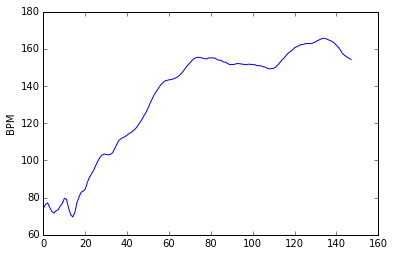

In [90]:
plt.plot(data_bpm)
plt.ylabel('BPM')